In [ ]:
%%capture
!pip install rdkit

In [ ]:
from rdkit import Chem



---

**AULA 4: MODIFICANDO MOLÉCULAS**

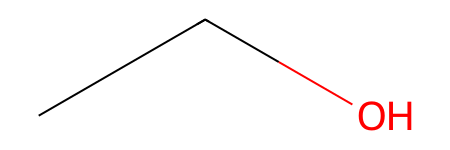

In [ ]:
#Definindo moléculas iniciais

mol1 = Chem.MolFromSmiles("CCO")
mol1

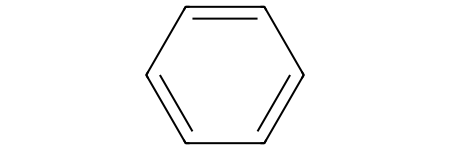

In [ ]:
mol2 = Chem.MolFromSmiles("C1=CC=CC=C1")
mol2

**---- EXIBIÇÃO DE HIDROGÊNIOS ----**

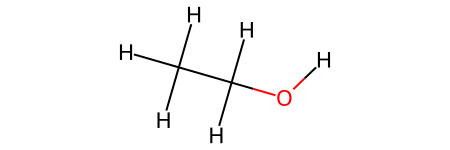

In [ ]:
#Função .AddHs()
#cria uma nova molécula em que os hidrogênios são exibidos

mol1_h = Chem.AddHs(mol1)
mol1_h

In [ ]:
#Os H são considerados na contagem agora

print(mol1.GetNumAtoms())
print(mol1_h.GetNumAtoms())

3
9


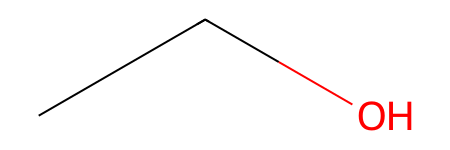

In [ ]:
#Função .RemoveHs()
#cria uma nova molécula em que os H são omitidos
mol1_ = Chem.RemoveHs(mol1_h)
mol1_



In [ ]:
print(mol1_.GetNumAtoms())

3


**---- ANÉIS ----**

In [ ]:
#Função .Kekulize()
#o programa naturalmente classifica todas as ligações de um anel aromático como "AROMATIC", considerando o efeito de ressonância
#a função kekulize muda essa classificação desconsiderando o efeito de ressonância, e diferenciando as ligações simples e duplas

#Sem a função

print("Tipos de ligação da molécula:")
for i in mol2.GetBonds():
  print(i.GetBondType())



Tipos de ligação da molécula:
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC


In [ ]:
#Com a função

Chem.Kekulize(mol2)

print("Tipos de ligação da molécula:")
for i in mol2.GetBonds():
  print(i.GetBondType())

Tipos de ligação da molécula:
DOUBLE
SINGLE
DOUBLE
SINGLE
DOUBLE
SINGLE


In [ ]:
#Internamente o programa ainda classifa aquelas ligações como "AROMATIC"

mol2.GetBondWithIdx(2).GetIsAromatic()

True

In [ ]:
#Para mudar a classificação precisamos especificar na função Kekulize

Chem.Kekulize(mol2, clearAromaticFlags=True)
mol2.GetBondWithIdx(0).GetIsAromatic()

False

In [ ]:
#Função .SanitizeMol()
#desfaz as alterações feitas

Chem.SanitizeMol(mol2)

print("Tipos de ligação da molécula:")
for i in mol2.GetBonds():
  print(i.GetBondType())

print("\n")
mol2.GetBondWithIdx(0).GetIsAromatic()

Tipos de ligação da molécula:
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC




True